# Loan Approval Prediction

### Data preprocessing

In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing 

In [7]:
data = pd.read_csv("LoanApprovalPrediction.csv") 

In [8]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
data.shape

(598, 13)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


### Handling Missing Values

In [11]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
percent = (data.isnull().sum()/data.isnull().count())*100

In [13]:
percent

Loan_ID              0.000000
Gender               0.000000
Married              0.000000
Dependents           2.006689
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.511706
Loan_Amount_Term     2.341137
Credit_History       8.193980
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [14]:
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mean())
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mean())

In [15]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Exploratory Data Analysis (EDA)

In [61]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,598.0,0.814381,0.389124,0.0,1.0,1.0,1.0,1.0
Married,598.0,0.648829,0.477736,0.0,0.0,1.0,1.0,1.0
Dependents,598.0,0.755973,0.997572,0.0,0.0,0.0,1.0,3.0
Education,598.0,0.222408,0.416212,0.0,0.0,0.0,0.0,1.0
Self_Employed,598.0,0.183946,0.387765,0.0,0.0,0.0,0.0,1.0
ApplicantIncome,598.0,5292.252508,5807.265364,150.0,2877.5,3806.0,5746.0,81000.0
CoapplicantIncome,598.0,1631.499866,2953.315785,0.0,0.0,1211.5,2324.0,41667.0
LoanAmount,598.0,144.968804,81.236564,9.0,100.0,128.0,163.5,650.0
Loan_Amount_Term,598.0,341.917808,64.436899,12.0,360.0,360.0,360.0,480.0
Credit_History,598.0,0.843352,0.348551,0.0,1.0,1.0,1.0,1.0


<AxesSubplot:xlabel='count', ylabel='Gender'>

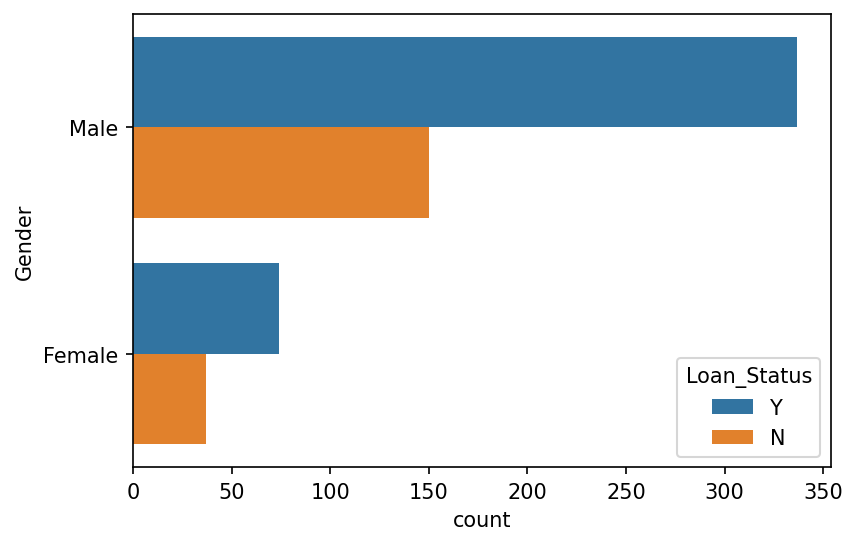

In [17]:
plt.figure(dpi = 150)
sns.countplot(y = 'Gender',hue = 'Loan_Status',data = data)

<AxesSubplot:xlabel='count', ylabel='Married'>

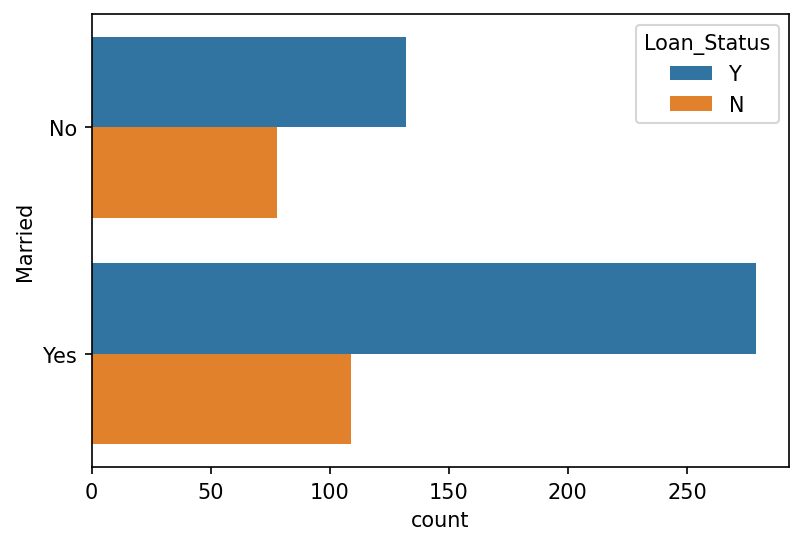

In [18]:
plt.figure(dpi = 150)
sns.countplot(y = 'Married',hue = 'Loan_Status',data = data)

<AxesSubplot:xlabel='count', ylabel='Self_Employed'>

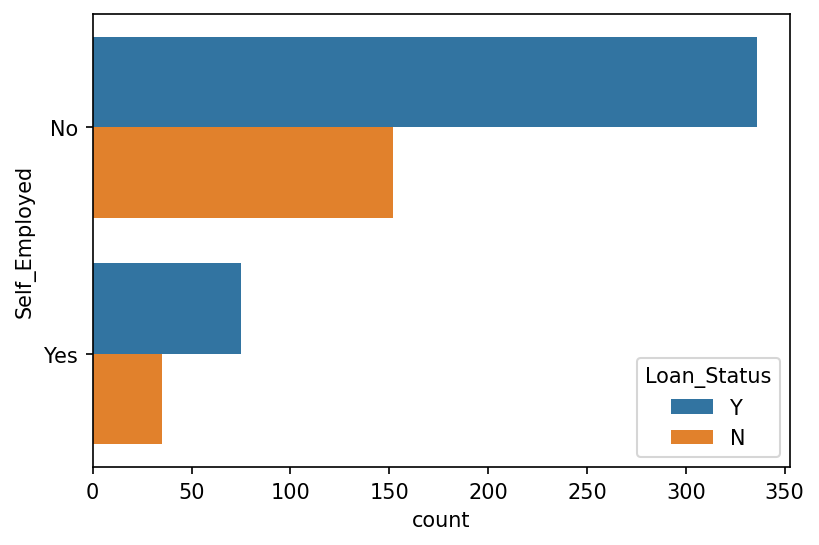

In [19]:
plt.figure(dpi = 150)
sns.countplot(y = 'Self_Employed',hue = 'Loan_Status',data = data)

<AxesSubplot:xlabel='count', ylabel='Credit_History'>

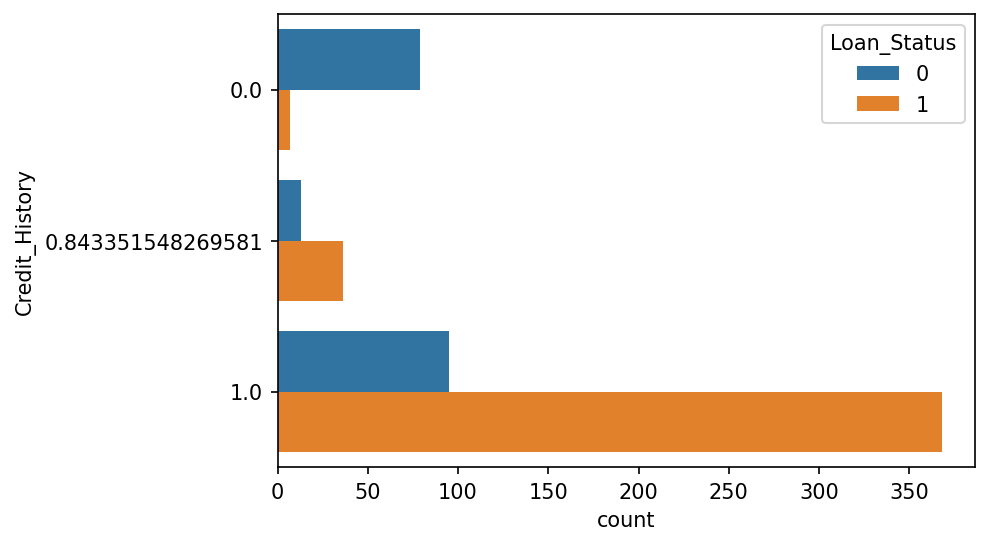

In [51]:
plt.figure(dpi = 150)
sns.countplot(y = 'Credit_History',hue = 'Loan_Status',data = data)

<AxesSubplot:xlabel='count', ylabel='Property_Area'>

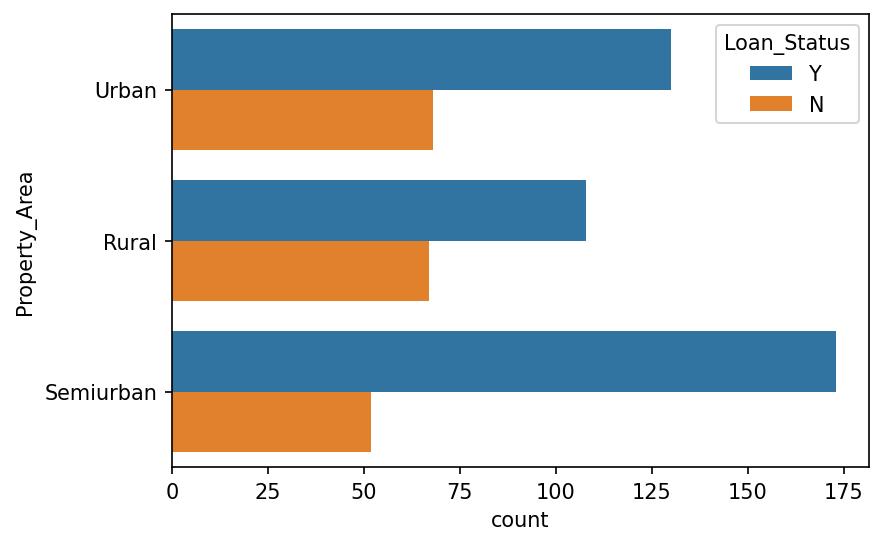

In [21]:
plt.figure(dpi = 150)
sns.countplot(y = 'Property_Area',hue = 'Loan_Status',data = data)

In [22]:
# label_encoder object knows how  
# to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
obj = (data.dtypes == 'object') 
for col in list(obj[obj].index): 
    data[col] = label_encoder.fit_transform(data[col])

In [23]:
#drop the uniques loan id
data.drop(['Loan_ID'],axis=1,inplace=True)

<AxesSubplot:>

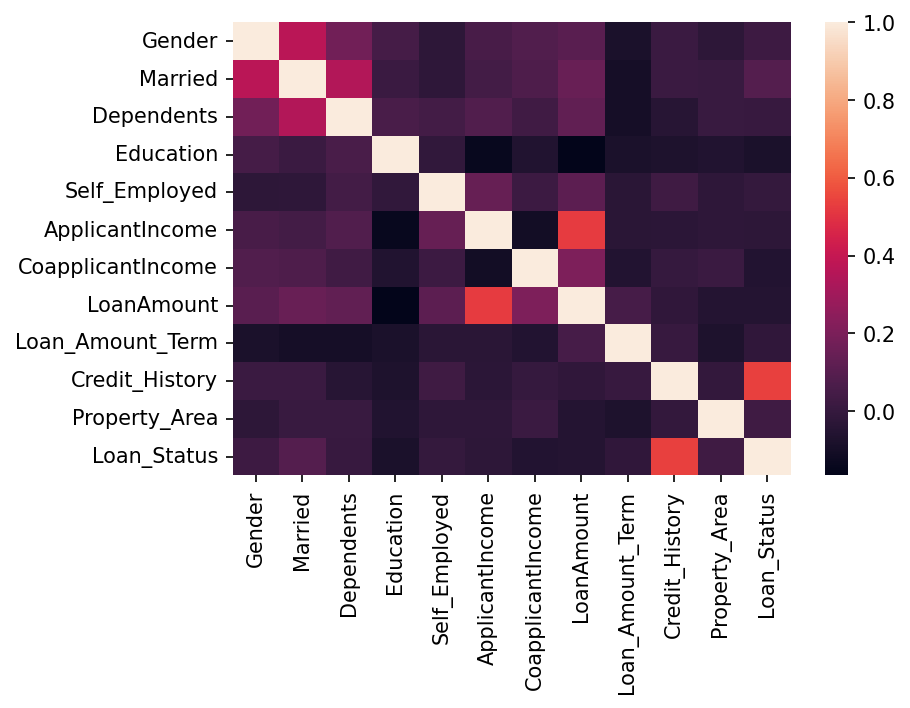

In [24]:
plt.figure(dpi = 150)
sns.heatmap(data.corr())

### Model Training and Evaluation

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [26]:
X = data.drop(['Loan_Status'],axis=1) 
Y = data['Loan_Status'] 

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=25)

In [28]:
# Logistic Regression 
model = LogisticRegression()


In [29]:
model.fit(X_train, Y_train)

LogisticRegression()

In [30]:
ypred = model.predict(X_test)
print(ypred)

[1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0
 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1]


In [31]:
evaluation = f1_score(Y_test, ypred)
print(evaluation)

0.8729281767955802


In [57]:
## confusio  matrix
cm = confusion_matrix(Y_test,ypred)
print(cm)
acc = (sum(np.diag(cm))/len(Y_test))
print(acc)
## Another method
metrics.accuracy_score(Y_test,ypred)

[[18 21]
 [ 2 79]]
0.8083333333333333


0.8083333333333333

In [32]:
## Using Decision Tree Classifier

tree = DecisionTreeClassifier()

In [33]:
tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [34]:
y_predtree = tree.predict(X_test)
print(y_predtree)

[1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1
 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0
 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1
 0 1 1 1 1 1 0 1 1]


In [35]:
evaluation_tree = f1_score(Y_test, y_predtree)
print(evaluation_tree)

0.8292682926829269


In [58]:
## confusio  matrix
cm = confusion_matrix(Y_test,y_predtree)
print(cm)
acc = (sum(np.diag(cm))/len(Y_test))
print(acc)
## Another method
metrics.accuracy_score(Y_test,y_predtree)

[[24 15]
 [13 68]]
0.7666666666666667


0.7666666666666667

In [36]:
## Using Random Forset Classifier

forest = RandomForestClassifier()

In [37]:
forest.fit(X_train,Y_train)

RandomForestClassifier()

In [38]:
y_pred_forest = forest.predict(X_test)
print(y_pred_forest)

[1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0
 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 1]


In [39]:
evaluation_forest = f1_score(Y_test, y_pred_forest)
print(evaluation_forest)

0.8651685393258426


In [59]:
## confusio  matrix
cm = confusion_matrix(Y_test,y_pred_forest)
print(cm)
acc = (sum(np.diag(cm))/len(Y_test))
print(acc)
## Another method
metrics.accuracy_score(Y_test,y_pred_forest)

[[19 20]
 [ 4 77]]
0.8


0.8

### Model Comparison

In [40]:
# Comparison of Three algorithms
print("Comparison of different algorithms\n")
print(f'Linear Regression : {evaluation} \nDecision Tree : {evaluation_tree} \nRandom Forest : {evaluation_forest}')

Comparison of different algorithms

Linear Regression : 0.8729281767955802 
Decision Tree : 0.8292682926829269 
Random Forest : 0.8651685393258426


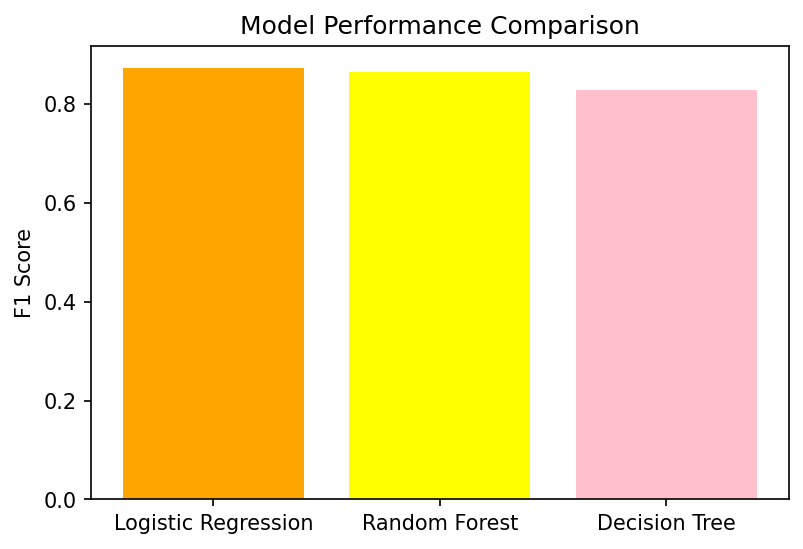

In [60]:
scores = {'Logistic Regression': evaluation,'Random Forest': evaluation_forest, 'Decision Tree': evaluation_tree}
plt.figure(dpi = 150)
plt.bar(scores.keys(), scores.values(), color= ['orange','yellow','pink'])
plt.ylabel('F1 Score')
plt.title('Model Performance Comparison')
plt.show()